# Multi Layar Perceptron on MNIST DataSet

In [1]:
from keras.utils import np_utils
from keras.datasets import mnist
import seaborn as sns
from keras.initializers import he_normal, glorot_normal
import pandas as pd
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time


C:\Users\Aman\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def plt_dynamic(x, vy, ty, ax, title, color = ['b']):
    ax.plot(x, vy, 'b', label = 'Validation loss')
    ax.plot(x, ty, 'b', label = 'Test loss')
    plt.legend()
    plt.grid()
    plt.title(title)
    fig.canvas.draw_idle()

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [5]:
X_train = X_train/255
X_test = X_test/255

In [6]:
Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)


In [7]:
from keras.models import Sequential 
from keras.layers import Dense, Activation
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
from keras.optimizers import Adam
import os
import pickle

In [8]:
output_dim = 10
input_dim = X_train.shape[1]
batch_size = 256
nb_epoch = 25
X_train = X_train
Y_train = Y_train
X_test = X_test
Y_test = Y_test
def param():
    output_dim = 10
    input_dim = X_train.shape[1]
    batch_size = 256
    nb_epoch = 25
    X_train = X_train
    Y_train = Y_train
    X_test = X_test
    Y_test = Y_test
    

In [9]:

def best_hyperparameters(activ, drop_rt, param):
    if activ == 'relu':
        initializer = 'he_normal'
    else: 
        initializer = 'glorot_normal'
    

    model = Sequential()
    model.add(Dense(448, activation=activ, input_shape=(input_dim,), kernel_initializer=initializer))
    model.add(BatchNormalization())
    model.add(Dropout(drop_rt))
    
    model.add(Dense(320, activation=activ, kernel_initializer=initializer)) 
    model.add(BatchNormalization())
    model.add(Dropout(drop_rt))
    
    model.add(Dense(output_dim, activation='softmax'))


    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
    
    model = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=0, validation_data=(X_test, Y_test))
    
    return model

In [10]:
do_you_want_to_tune_hyperparameter = False

if do_you_want_to_tune_hyperparameter:
    active = ['tanh', 'sigmoid', 'relu']
    drop_ret = [0.2, 0.4, 0.6, 0.9]
    df_val1 = df_test1 =  pd.DataFrame(columns = active, index = drop_ret)
    
    import warnings
    warnings.filterwarnings("ignore")

    for i, activ in tqdm(enumerate(active)):
        for j, drop_rt in enumerate(drop_ret):
    
            model = best_hyperparameters(activ, drop_rt, param)
            ty = np.round((max(model.history['acc']))*100, 2)
            vy = np.round((max(model.history['val_acc']))*100, 2)
            df_val1.iloc[j, i]  = vy
            df_test1.iloc[j ,i] = ty
    

In [11]:
if os.path.isfile('df_test1.pickle') and os.path.isfile('df_val1.pickle'):    
    pickle_in = open("df_test1.pickle","rb")
    df_test1 = pickle.load(pickle_in)

    pickle_in = open("df_val1.pickle","rb")
    df_val1 = pickle.load(pickle_in)

In [12]:
df_test1 = df_test1.astype(float)
df_val1 = df_val1.astype(float)

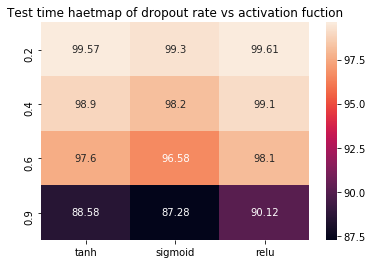

best activation fucntion  relu
best drop out rate  0.2


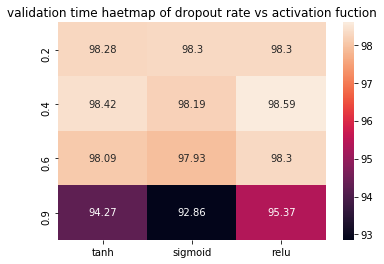

In [13]:
sns.heatmap(df_test1, annot  = True, fmt = 'g')
plt.title("Test time haetmap of dropout rate vs activation fuction")
plt.show()

activ = 'relu'
drop_rt = 0.2
print("best activation fucntion ", activ)
print("best drop out rate ", drop_rt)

sns.heatmap(df_val1, annot  = True, fmt = 'g')
plt.title("validation time haetmap of dropout rate vs activation fuction")
plt.show()

In [14]:
if os.path.isfile('model1.pickle'):
    import warnings
    warnings.filterwarnings("ignore")

    pickle_in = open("model1.pickle","rb")
    model1 = pickle.load(pickle_in)
else:
    model1 = best_hyperparameters(activ, drop_rt, param)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [15]:
ty1 = np.round([item * 100 for item in model1.history['acc']], 2)
vy1 = np.round([item * 100 for item in model1.history['val_acc']], 2)

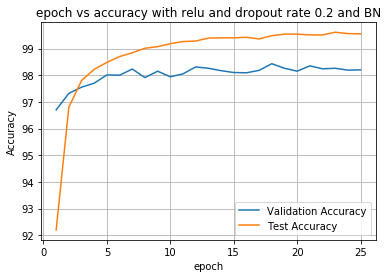

In [16]:
plt.plot(range(1,26), vy1, label = 'Validation Accuracy')
plt.plot(range(1, 26), ty1, label = "Test Accuracy")
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.title("epoch vs accuracy with relu and dropout rate 0.2 and BN")
plt.show()

In [17]:

def best_hyperparameters(activ, drop_rt, param):
    if activ == 'relu':
        initializer = 'he_normal'
    else: 
        initializer = 'glorot_normal'
    

    model = Sequential()
    model.add(Dense(448, activation=activ, input_shape=(input_dim,), kernel_initializer=initializer))
    model.add(BatchNormalization())
    model.add(Dropout(drop_rt))
    
    model.add(Dense(320, activation=activ, kernel_initializer=initializer)) 
    model.add(BatchNormalization())
    model.add(Dropout(drop_rt))
    
    model.add(Dense(192, activation=activ, kernel_initializer=initializer)) 
    model.add(BatchNormalization())
    model.add(Dropout(drop_rt))
    
    model.add(Dense(output_dim, activation='softmax'))


    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
    
    model = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=0, validation_data=(X_test, Y_test))
    
    return model

In [18]:
do_you_want_to_tune_hyperparameter = False

if do_you_want_to_tune_hyperparameter:
    active = ['tanh', 'sigmoid', 'relu']
    drop_ret = [0.2, 0.4, 0.6, 0.9]
    df_val2 = df_test2 =  pd.DataFrame(columns = active, index = drop_ret)
    
    import warnings
    warnings.filterwarnings("ignore")

    for i, activ in tqdm(enumerate(active)):
        for j, drop_rt in enumerate(drop_ret):
    
            model = best_hyperparameters(activ, drop_rt, param)
            ty = np.round((max(model.history['acc']))*100, 2)
            vy = np.round((max(model.history['val_acc']))*100, 2)
            df_val2.iloc[j, i]  = vy
            df_test2.iloc[j ,i] = ty
    

In [19]:
if os.path.isfile('df_test2.pickle') and os.path.isfile('df_val2.pickle'):    
    pickle_in = open("df_test2.pickle","rb")
    df_test2 = pickle.load(pickle_in)

    pickle_in = open("df_val2.pickle","rb")
    df_val2 = pickle.load(pickle_in)

In [20]:
df_test2 = df_test2.astype(float)
df_val2 = df_val2.astype(float)

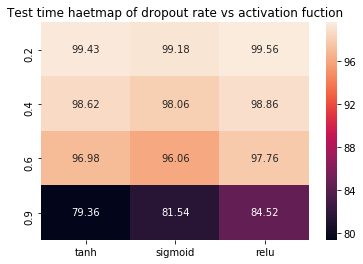

best activation fucntion  relu
best drop out rate  0.2


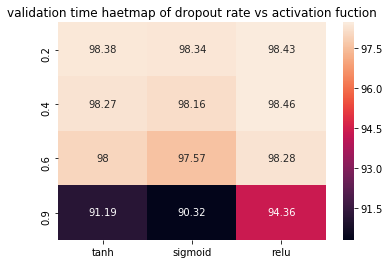

In [21]:
sns.heatmap(df_test2, annot  = True, fmt = 'g')
plt.title("Test time haetmap of dropout rate vs activation fuction")
plt.show()

activ = 'relu'
drop_rt = 0.2
print("best activation fucntion ", activ)
print("best drop out rate ", drop_rt)

sns.heatmap(df_val2, annot  = True, fmt = 'g')
plt.title("validation time haetmap of dropout rate vs activation fuction")
plt.show()

In [22]:
if os.path.isfile('model2.pickle'):
    import warnings
    warnings.filterwarnings("ignore")

    pickle_in = open("model2.pickle","rb")
    model2 = pickle.load(pickle_in)
else:
    model2 = best_hyperparameters(activ, drop_rt, param)

In [23]:
ty2 = np.round([item * 100 for item in model2.history['acc']], 2)
vy2 = np.round([item * 100 for item in model2.history['val_acc']], 2)

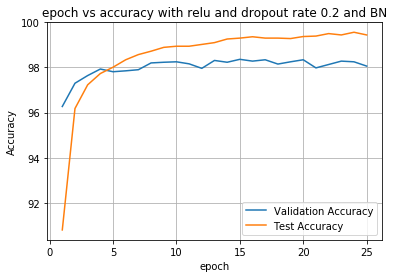

In [24]:
plt.plot(range(1,26), vy2, label = 'Validation Accuracy')
plt.plot(range(1, 26), ty2, label = "Test Accuracy")
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.title("epoch vs accuracy with relu and dropout rate 0.2 and BN")
plt.show()

In [25]:

def best_hyperparameters(activ, drop_rt, param):
    if activ == 'relu':
        initializer = 'he_normal'
    else: 
        initializer = 'glorot_normal'
    

    model = Sequential()
    model.add(Dense(448, activation=activ, input_shape=(input_dim,), kernel_initializer=initializer))
    model.add(BatchNormalization())
    model.add(Dropout(drop_rt))
    
    model.add(Dense(384, activation=activ, kernel_initializer=initializer)) 
    model.add(BatchNormalization())
    model.add(Dropout(drop_rt))
    
    model.add(Dense(320, activation=activ, kernel_initializer=initializer)) 
    model.add(BatchNormalization())
    model.add(Dropout(drop_rt))
    
    model.add(Dense(256, activation=activ, kernel_initializer=initializer)) 
    model.add(BatchNormalization())
    model.add(Dropout(drop_rt))
    
    model.add(Dense(192, activation=activ, kernel_initializer=initializer)) 
    model.add(BatchNormalization())
    model.add(Dropout(drop_rt))
    
    model.add(Dense(output_dim, activation='softmax'))


    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
    
    model = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=0, validation_data=(X_test, Y_test))
    
    return model

In [26]:
do_you_want_to_tune_hyperparameter = False

if do_you_want_to_tune_hyperparameter:
    active = ['tanh', 'sigmoid', 'relu']
    drop_ret = [0.2, 0.4, 0.6, 0.9]
    df_val3 = df_test3 =  pd.DataFrame(columns = active, index = drop_ret)
    
    import warnings
    warnings.filterwarnings("ignore")

    for i, activ in tqdm(enumerate(active)):
        for j, drop_rt in enumerate(drop_ret):
    
            model = best_hyperparameters(activ, drop_rt, param)
            ty = np.round((max(model.history['acc']))*100, 2)
            vy = np.round((max(model.history['val_acc']))*100, 2)
            df_val3.iloc[j, i]  = vy
            df_test3.iloc[j ,i] = ty
    

In [27]:
if os.path.isfile('df_test3.pickle') and os.path.isfile('df_val3.pickle'):    
    pickle_in = open("df_test3.pickle","rb")
    df_test3 = pickle.load(pickle_in)

    pickle_in = open("df_val3.pickle","rb")
    df_val3 = pickle.load(pickle_in)

In [28]:
df_test3 = df_test3.astype(float)
df_val3 = df_val3.astype(float)

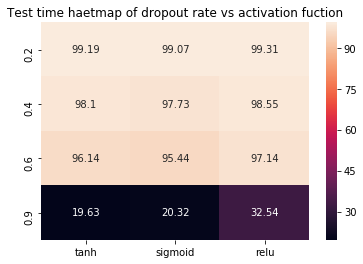

best activation fucntion  relu
best drop out rate  0.2


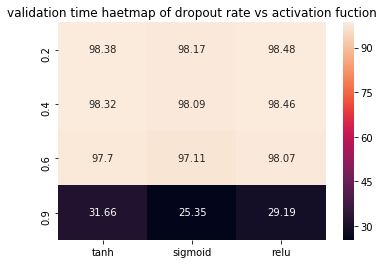

In [29]:
sns.heatmap(df_test3, annot  = True, fmt = 'g')
plt.title("Test time haetmap of dropout rate vs activation fuction")
plt.show()

activ = 'relu'
drop_rt = 0.2
print("best activation fucntion ", activ)
print("best drop out rate ", drop_rt)

sns.heatmap(df_val3, annot  = True, fmt = 'g')
plt.title("validation time haetmap of dropout rate vs activation fuction")
plt.show()

In [30]:
if os.path.isfile('model3.pickle'):
    import warnings
    warnings.filterwarnings("ignore")

    pickle_in = open("model3.pickle","rb")
    model3 = pickle.load(pickle_in)
else:
    model3 = best_hyperparameters(activ, drop_rt, param)

In [31]:
ty3 = np.round([item * 100 for item in model3.history['acc']], 2)
vy3 = np.round([item * 100 for item in model3.history['val_acc']], 2)

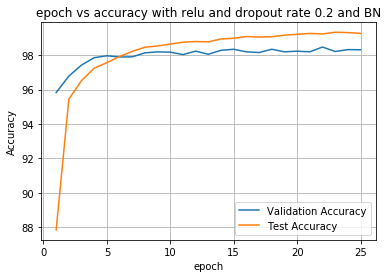

In [32]:
plt.plot(range(1,26), vy3, label = 'Validation Accuracy')
plt.plot(range(1, 26), ty3, label = "Test Accuracy")
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.title("epoch vs accuracy with relu and dropout rate 0.2 and BN")
plt.show()

In [37]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Model", "layer", "dropout rate", "activation", "Test", "Validation"]

x.add_row(["1", "448-384-320-256-192", 0.2, 'relu', max(ty3), max(vy3)])
x.add_row(["2", "448-320-192", 0.2, 'relu', max(ty2), max(vy2)])
x.add_row(["3", "448-320", 0.2, 'relu', max(ty1), max(vy1)])

print(x)

+-------+---------------------+--------------+------------+-------+------------+
| Model |        layer        | dropout rate | activation |  Test | Validation |
+-------+---------------------+--------------+------------+-------+------------+
|   1   | 448-384-320-256-192 |     0.2      |    relu    | 99.34 |   98.48    |
|   2   |     448-320-192     |     0.2      |    relu    | 99.56 |   98.36    |
|   3   |       448-320       |     0.2      |    relu    | 99.61 |   98.43    |
+-------+---------------------+--------------+------------+-------+------------+


# conclusion:

* we have 3 architectire with different layer and drop out rate with 
  batch normalization
* After that we tune hyperparameter with drop out and activation function
* Actually all architeure were run over google colab and made pickle file
  and loaded here becuase over colab it was fater than jupyter(4times)
* Then plotted the table with all 3 architure 
* we noticed that all 3 model giving same accuracy so we will pick which have
  less number of parameter that is 2 layer network because it is faster to 
  train and test  